In [4]:
!pip install yfinance

     ---------------------------------------- 0.0/948.2 kB ? eta -:--:--
     ----------- ---------------------------- 262.1/948.2 kB ? eta -:--:--
     -------------------------------------- 948.2/948.2 kB 2.9 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   ----- ---------------------------------- 0.5/3.8 MB 3.3 MB/s eta 0:00:02
   ---------- ----------------------------- 1.0/3.8 MB 3.0 MB/s eta 0:00:01
   ------------------- -------------------- 1.8/3.8 MB 2.9 MB/s eta 0:00:01
   ------------------------ --------------- 2.4/3.8 MB 2.9 MB/s eta 0:00:01
   ------------------------------ --------- 2.9/3.8 MB 2.9 MB/s eta 0

In [1]:
import numpy as np 
import pandas as pd   

import yfinance as yf 

import seaborn as sns 
import matplotlib.pyplot as plt   
%matplotlib inline 

In [2]:
stocks = input("Enter the code of the stock:- ") 
data = yf.download(stocks, "2008-01-01", "2021-01-18", auto_adjust=True) 
data.head()

Enter the code of the stock:-  NG=F


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,NG=F,NG=F,NG=F,NG=F,NG=F
Date,,,,,
2008-01-02,7.850,7.876,7.564,7.572,68553
2008-01-03,7.674,7.980,7.610,7.873,72742
2008-01-04,7.841,7.859,7.500,7.652,61496
2008-01-07,7.879,7.940,7.701,7.803,56675
2008-01-08,7.967,7.997,7.880,7.909,53775


In [3]:
print(data.shape)

(3282, 5)


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3282 entries, 2008-01-02 to 2021-01-15
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, NG=F)   3282 non-null   float64
 1   (High, NG=F)    3282 non-null   float64
 2   (Low, NG=F)     3282 non-null   float64
 3   (Open, NG=F)    3282 non-null   float64
 4   (Volume, NG=F)  3282 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 153.8 KB


In [5]:
data.describe()

Price,Close,High,Low,Open,Volume
Ticker,NG=F,NG=F,NG=F,NG=F,NG=F
count,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000
mean,3.707074,3.787288,3.635038,3.713705,131397.603595
std,1.825297,1.865744,1.789584,1.830425,54393.040171
min,1.482000,1.567000,1.432000,1.441000,0.000000
25%,2.693000,2.736500,2.644000,2.691250,91744.250000
50%,3.240500,3.312000,3.183500,3.253000,126669.500000
75%,4.152000,4.244750,4.066750,4.157750,161490.500000
max,13.577000,13.694000,13.306000,13.580000,459196.000000


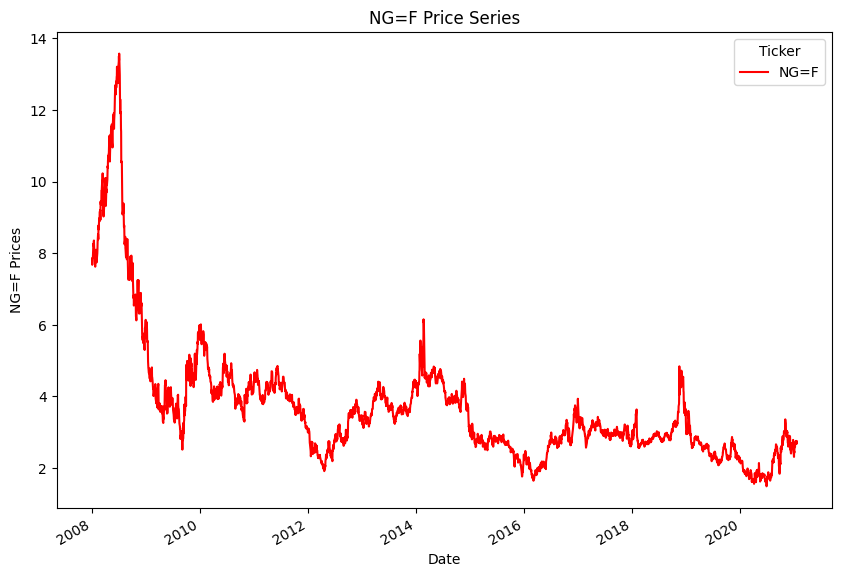

In [6]:
data.Close.plot(figsize=(10, 7),color='r')
plt.ylabel("{} Prices".format(stocks))
plt.title("{} Price Series".format(stocks))
plt.show()

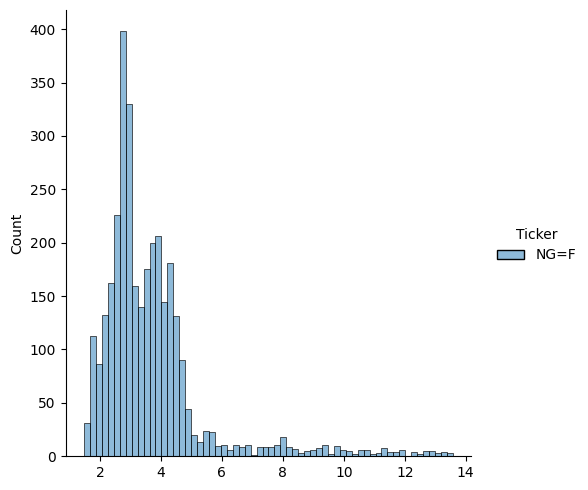

In [7]:
sns.displot(data["Close"])

In [10]:
X = data.drop("Close", axis=1) 
y = data["Close"] 

from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test  = train_test_split(X,y,test_size=0.2, random_state=0) 
print(X_train.shape) 
print(X_test.shape) 
print(y_train.shape) 
print(y_test.shape) 

(2625, 4)
(657, 4)
(2625, 1)
(657, 1)


In [11]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression() 
lr.fit(X_train, y_train) 
pred1 = lr.predict(X_test)

In [12]:
from sklearn.metrics import mean_squared_error, r2_score 


def calculate_metrics(y_test, y_pred):  
    ''' 
    y_test:- ground truth 
    y_pred:- model predict  
    '''
    mse = mean_squared_error(y_test, y_pred) 
    rmse = np.sqrt(mse) 
    r2_scors = r2_score(y_test, y_pred) 
    
    print("MSE:- ", mse) 
    print("RMSE:- ", rmse) 
    print("R2_score:- ", r2_scors) 
    
calculate_metrics(y_test, pred1)

MSE:-  0.0015345662928707806
RMSE:-  0.03917354072420287
R2_score:-  0.9994383299702766


In [13]:
from sklearn.linear_model import Lasso, Ridge 

la = Lasso().fit(X_train, y_train )
ri = Ridge().fit(X_train, y_train ) 

la_p = la.predict(X_test) 
ri_p = ri.predict(X_test)

In [14]:
calculate_metrics(y_test, la_p)

MSE:-  0.23691794405836028
RMSE:-  0.4867421741110588
R2_score:-  0.9132851351554736


In [15]:
calculate_metrics(y_test, ri_p)

MSE:-  0.0016151026199615053
RMSE:-  0.04018833935311965
R2_score:-  0.9994088526896658
